### The libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder


### Raeading Data

In [35]:
Data= pd.read_csv("/home/learner/Desktop/Data Anlaysis/Data/Hussain - Cleaned_Data.csv")

In [36]:
Data

,Id,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
0,20316087,Ertvelde,House,house,Private,329000,2,0,True,False,False,True,0,False,0,0,225,Good,3,False
1,20316069,Hornu,House,house,Private,180000,3,138,False,False,False,True,1,True,1,140,110,As new,2,True
2,20316048,Beersel,House,house,Private,369000,6,230,False,False,False,True,0,False,0,230,1660,To be done up,3,True
3,20316039,Geraardsbergen,House,house,Private,145000,2,80,True,False,False,False,0,False,0,80,30,Good,2,False
4,20316038,Geraardsbergen,House,house,Private,269000,3,155,True,False,False,True,20,True,170,345,250,Good,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,7892306,Ere,Other,offices,Private,263900,0,228,False,False,False,False,0,False,0,228,0,Good,0,False
13703,7810321,Drogenbos,Other,office-block,Private,1112000,0,556,False,False,False,False,0,False,0,556,556,Not Known,0,False
13704,7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False
13705,7066466,Duisburg,Other,lock-up-garage,Private,30000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False


In [37]:
## Top 10 Localities by Count

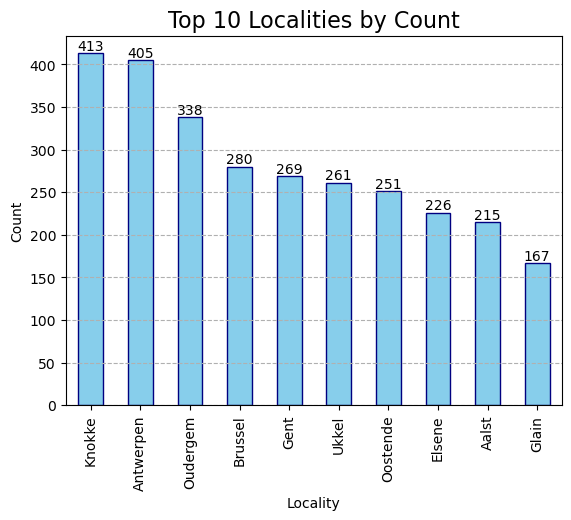

In [38]:
import matplotlib.pyplot as plt
import os


Top_localities = Data.groupby("Locality").size().sort_values(ascending=False).head(10)

# Plotting the bar chart
Top_localities.plot(kind='bar', color='skyblue', edgecolor="navy")

# Add numbers to each bar
for index, value in enumerate(Top_localities):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Top 10 Localities by Count', fontsize=16)
plt.xlabel('Locality')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=1)

# Create 'graphs' directory if it doesn't exist
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# Save the plot as an image
plt.savefig('graphs/top_localities.png', bbox_inches='tight')  # Save as PNG in the 'graphs' folder

# Show the plot (optional, if you also want to display it interactively)
plt.show()


In [274]:
Data.describe(include=['object', 'category'])

,Locality,Type,SubType,Sale_Type,State
count,13707,13707,13707,13707,13707
unique,838,3,35,1,7
top,Knokke,Apartment,apartment,Private,Good
freq,413,5991,4676,13707,4339


In [275]:
Data.Price.describe().astype(int)

count         13707
mean         551515
std        12837631
min               0
25%          225000
50%          325000
75%          479000
max      1500001600
Name: Price, dtype: int64

In [276]:
Data.drop_duplicates(inplace=True)

In [277]:
Data

,Id,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
0,20316087,Ertvelde,House,house,Private,329000,2,0,True,False,False,True,0,False,0,0,225,Good,3,False
1,20316069,Hornu,House,house,Private,180000,3,138,False,False,False,True,1,True,1,140,110,As new,2,True
2,20316048,Beersel,House,house,Private,369000,6,230,False,False,False,True,0,False,0,230,1660,To be done up,3,True
3,20316039,Geraardsbergen,House,house,Private,145000,2,80,True,False,False,False,0,False,0,80,30,Good,2,False
4,20316038,Geraardsbergen,House,house,Private,269000,3,155,True,False,False,True,20,True,170,345,250,Good,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,7892306,Ere,Other,offices,Private,263900,0,228,False,False,False,False,0,False,0,228,0,Good,0,False
13703,7810321,Drogenbos,Other,office-block,Private,1112000,0,556,False,False,False,False,0,False,0,556,556,Not Known,0,False
13704,7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False
13705,7066466,Duisburg,Other,lock-up-garage,Private,30000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False


In [278]:
Data=Data.set_index(Data.Id).drop("Id",axis=1)

In [279]:
Data

,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,Private,329000,2,0,True,False,False,True,0,False,0,0,225,Good,3,False
20316069,Hornu,House,house,Private,180000,3,138,False,False,False,True,1,True,1,140,110,As new,2,True
20316048,Beersel,House,house,Private,369000,6,230,False,False,False,True,0,False,0,230,1660,To be done up,3,True
20316039,Geraardsbergen,House,house,Private,145000,2,80,True,False,False,False,0,False,0,80,30,Good,2,False
20316038,Geraardsbergen,House,house,Private,269000,3,155,True,False,False,True,20,True,170,345,250,Good,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892306,Ere,Other,offices,Private,263900,0,228,False,False,False,False,0,False,0,228,0,Good,0,False
7810321,Drogenbos,Other,office-block,Private,1112000,0,556,False,False,False,False,0,False,0,556,556,Not Known,0,False
7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False


### Data Anlysis

In [280]:
Data .Price.describe().astype(int)

count         13615
mean         552726
std        12880903
min               0
25%          225000
50%          325000
75%          480000
max      1500001600
Name: Price, dtype: int64

How many rows and columns

In [281]:
Data.shape

(13615, 19)

correlation between variables

In [282]:

# convert bolean to zeros and one to calculate correlation
Data = Data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
Data

/tmp/ipykernel_30969/3617720521.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Data = Data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,Private,329000,2,0,1,0,0,1,0,0,0,0,225,Good,3,0
20316069,Hornu,House,house,Private,180000,3,138,0,0,0,1,1,1,1,140,110,As new,2,1
20316048,Beersel,House,house,Private,369000,6,230,0,0,0,1,0,0,0,230,1660,To be done up,3,1
20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,0,0,0,0,0,80,30,Good,2,0
20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,0,1,20,1,170,345,250,Good,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892306,Ere,Other,offices,Private,263900,0,228,0,0,0,0,0,0,0,228,0,Good,0,0
7810321,Drogenbos,Other,office-block,Private,1112000,0,556,0,0,0,0,0,0,0,556,556,Not Known,0,0
7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0


In [283]:
numerical_data = Data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix.Price

Price                  1.000000
Bedrooms               0.013827
Living_Area            0.027755
Is_Equiped_Kitchen    -0.005673
Is_Furnished           0.003684
Is_Open_Fire           0.004029
Terrace                0.010284
Terrace_Area           0.001424
Garden                -0.001989
Garden_Area            0.002830
Land_Surface           0.009103
Surface of the plot    0.010070
Facades                0.020382
Swim_pool             -0.000654
Name: Price, dtype: float64

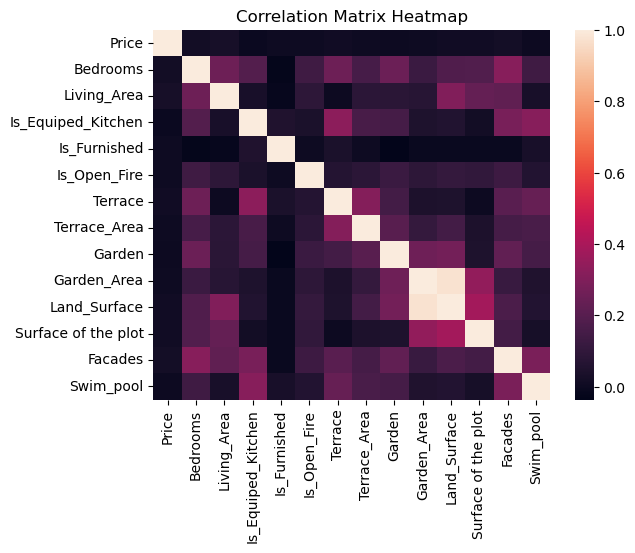

In [284]:
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')

# Save the heatmap image in the 'graphs' folder
plt.savefig('graphs/Bad_heatmap.png', bbox_inches='tight')  # Save as PNG in the 'graphs' folder

# Show the plot (optional)
plt.show()

No obvious Resuslt  since we have outlires!


- Which variables have the greatest influence on the price?
   #### Living_area 
- Which variables have the least influence on the price?
   #### Swim_pool

### But actually that is shit in case we have outlires !

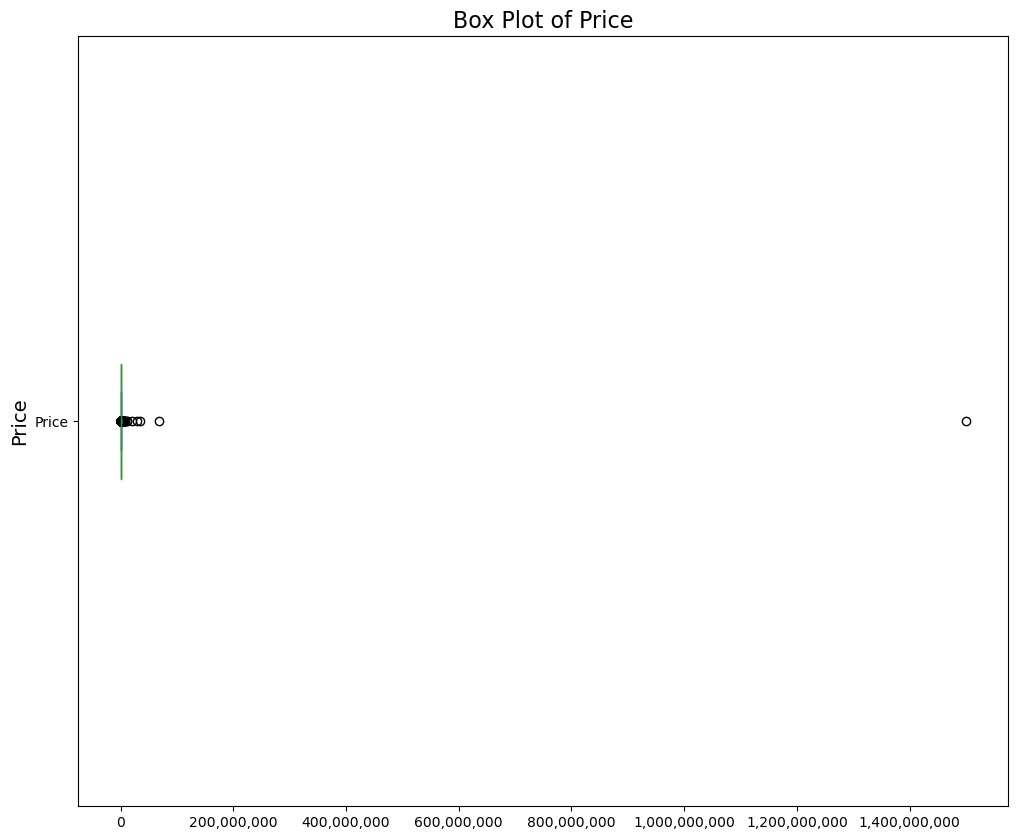

In [267]:
Data.Price.describe().astype(int)
plt.figure(figsize=(12,10))
Data.Price.plot(kind='box', patch_artist=True,vert=False, boxprops=dict(facecolor='skyblue', color='black'))
# Customize the plot
plt.title('Box Plot of Price', fontsize=16)
plt.ylabel('Price', fontsize=14)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1:,.0f}'))
plt.savefig('graphs/Box_Blot.png', bbox_inches='tight') 
plt.show()

### So we  should take of thew outtlires !


In [150]:
Outliers = Data[(Data.Price > 1000000) | (Data.Price < 30000)]
Outliers


,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20315996,Brussel,House,house,Private,1280000,5,518,1,0,1,1,30,1,285,833,0,Good,2,1
20315995,Elsene,House,house,Private,1280000,5,518,1,0,1,1,30,1,285,833,0,Good,2,1
20315994,Watermaal-bosvoorde,House,house,Private,1280000,5,518,1,0,1,1,30,1,285,833,0,Good,2,1
20315862,Elsene,Apartment,apartment,Private,1250000,2,153,1,0,0,1,0,0,0,153,0,As new,3,0
20315515,Bergilers,Apartment,apartment-block,Private,1295000,3,1363,1,0,0,1,0,0,0,1363,4528,Good,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518463,Mons,Other,outdoor-parking-space,Private,7500,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
8518451,Monstreux,Other,outdoor-parking-space,Private,6500,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
7810321,Drogenbos,Other,office-block,Private,1112000,0,556,0,0,0,0,0,0,0,556,556,Not Known,0,0


In [195]:
Data_cleaned = Data[~((Data.Price > 1000000) | (Data.Price < 30000))]

In [196]:
Data_cleaned

,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,Private,329000,2,0,1,0,0,1,0,0,0,0,225,Good,3,0
20316069,Hornu,House,house,Private,180000,3,138,0,0,0,1,1,1,1,140,110,As new,2,1
20316048,Beersel,House,house,Private,369000,6,230,0,0,0,1,0,0,0,230,1660,To be done up,3,1
20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,0,0,0,0,0,80,30,Good,2,0
20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,0,1,20,1,170,345,250,Good,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031851,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
8031838,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
7961536,Aarsele,Apartment,apartment,Private,305000,2,70,1,0,0,0,0,0,0,70,0,Good,0,0


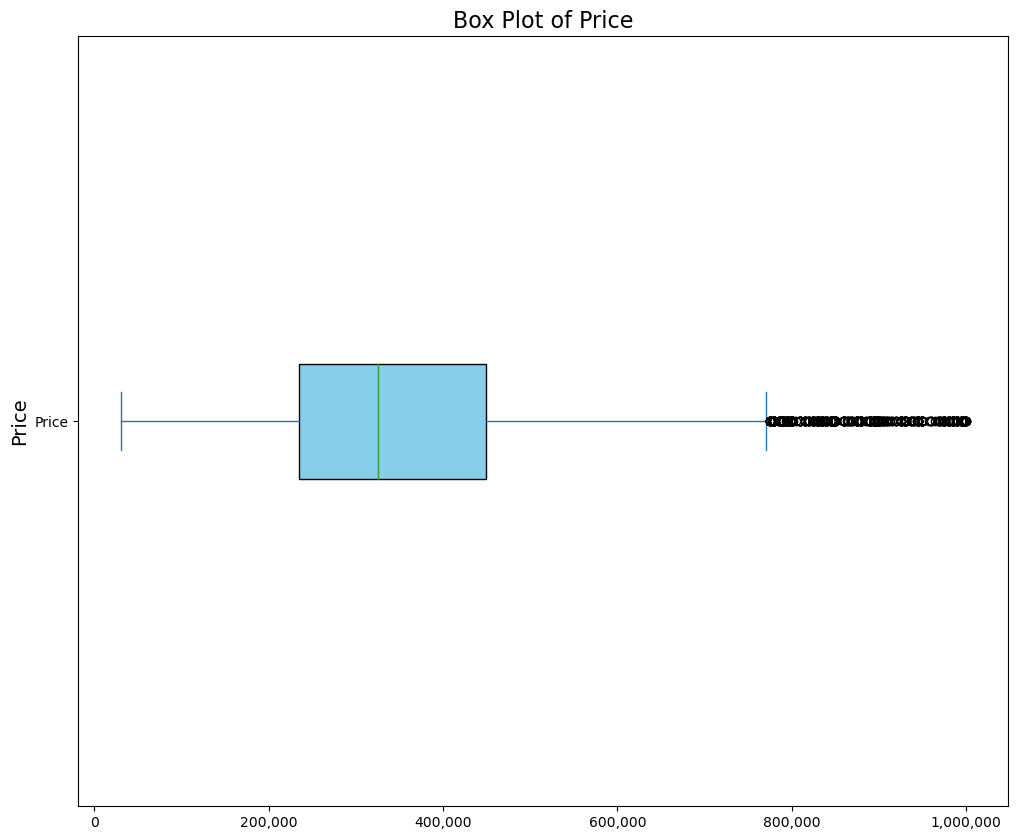

In [268]:
Data_cleaned.Price.describe().astype(int)
plt.figure(figsize=(12,10))
Data_cleaned.Price.plot(kind='box', patch_artist=True,vert=False, boxprops=dict(facecolor='skyblue', color='black'))
# Customize the plot
plt.title('Box Plot of Price', fontsize=16)
plt.ylabel('Price', fontsize=14)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1:,.0f}'))
plt.savefig('graphs/Box_plot2.png', bbox_inches='tight') 
plt.show()

## Doing  Data Analysis steps again


In [198]:
Data_cleaned.Price.describe().astype(int)

count     12203
mean     361228
std      192578
min       30000
25%      234750
50%      325000
75%      449000
max      999999
Name: Price, dtype: int64

In [199]:
Data_cleaned.shape

(12203, 19)

In [200]:
numerical_data = Data_cleaned.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,Facades,Swim_pool
Price,1.000000,0.359020,0.498811,0.120943,-0.018175,0.089115,0.163864,0.164729,0.073700,0.100079,0.182309,0.172238,0.170368,0.121826
Bedrooms,0.359020,1.000000,0.423782,0.129851,-0.061214,0.112804,0.179585,0.130495,0.228572,0.090148,0.159502,0.170341,0.272773,0.078581
Living_Area,0.498811,0.423782,1.000000,0.055677,-0.064823,0.102175,0.018590,0.101140,0.152029,0.095917,0.255921,0.273352,0.266372,0.014476
Is_Equiped_Kitchen,0.120943,0.129851,0.055677,1.000000,0.035518,0.039955,0.282535,0.138310,0.124524,0.039554,0.052127,0.011977,0.241066,0.297201
Is_Furnished,-0.018175,-0.061214,-0.064823,0.035518,1.000000,-0.007290,0.034555,-0.005420,-0.043501,-0.009387,-0.019615,-0.021659,-0.028264,0.030918
Is_Open_Fire,0.089115,0.112804,0.102175,0.039955,-0.007290,1.000000,0.050428,0.059219,0.112406,0.069715,0.085877,0.053962,0.116455,0.032608
Terrace,0.163864,0.179585,0.018590,0.282535,0.034555,0.050428,1.000000,0.304286,0.116073,0.043860,0.056353,-0.008629,0.145145,0.204061
Terrace_Area,0.164729,0.130495,0.101140,0.138310,-0.005420,0.059219,0.304286,1.000000,0.176098,0.091912,0.141053,0.019412,0.124074,0.144725
Garden,0.073700,0.228572,0.152029,0.124524,-0.043501,0.112406,0.116073,0.176098,1.000000,0.289514,0.310697,0.068953,0.203595,0.127780
Garden_Area,0.100079,0.090148,0.095917,0.039554,-0.009387,0.069715,0.043860,0.091912,0.289514,1.000000,0.986132,0.361633,0.120746,0.039487


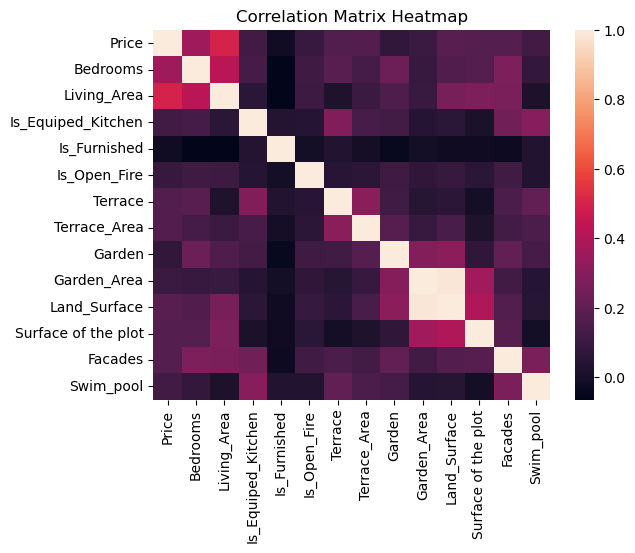

In [269]:
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')

# Save the heatmap image in the 'graphs' folder
plt.savefig('graphs/Good_correlation_heatmap.png', bbox_inches='tight')  # Save as PNG in the 'graphs' folder

# Show the plot (optional)
plt.show()

Price                  1.000000
Bedrooms               0.359020
Living_Area            0.498811
Is_Equiped_Kitchen     0.120943
Is_Furnished          -0.018175
Is_Open_Fire           0.089115
Terrace                0.163864
Terrace_Area           0.164729
Garden                 0.073700
Garden_Area            0.100079
Land_Surface           0.182309
Surface of the plot    0.172238
Facades                0.170368
Swim_pool              0.121826
Name: Price, dtype: float64


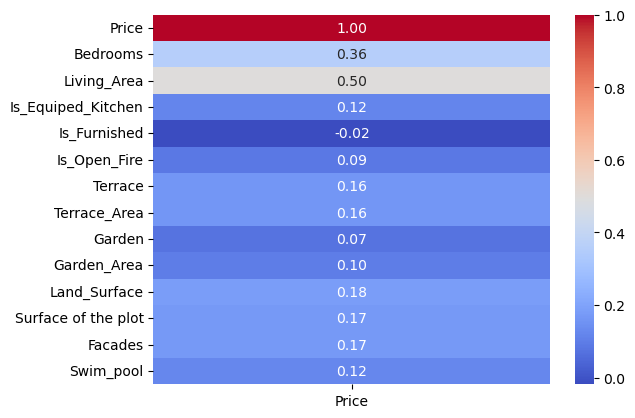

In [202]:
print(correlation_matrix.Price)
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

 ### - Which variables have the greatest influence on the price?
 Living_Area and Bedrooms'number 
 
### - Which variables have the least influence on the price?
Garden , Is_Open_Fire and Is_Furnachered

## - How many qualitative and quantitative variables are there? How would you transform these values into numerical values?




In [203]:
Data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12203 entries, 20316087 to 7066466
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Locality             12203 non-null  object
 1   Type                 12203 non-null  object
 2   SubType              12203 non-null  object
 3   Sale_Type            12203 non-null  object
 4   Price                12203 non-null  int64 
 5   Bedrooms             12203 non-null  int64 
 6   Living_Area          12203 non-null  int64 
 7   Is_Equiped_Kitchen   12203 non-null  int64 
 8   Is_Furnished         12203 non-null  int64 
 9   Is_Open_Fire         12203 non-null  int64 
 10  Terrace              12203 non-null  int64 
 11  Terrace_Area         12203 non-null  int64 
 12  Garden               12203 non-null  int64 
 13  Garden_Area          12203 non-null  int64 
 14  Land_Surface         12203 non-null  int64 
 15  Surface of the plot  12203 non-null  int64 
 16  

## Qualitative (Categorical) Variables:
These variables represent categories or groups:
- Locality (object)
- Type (object)
- SubType (object)
- Sale_Type (object)
- State (object)

## Quantitative (Numeric) Variables:

#### These variables represent measurable quantities:
- Price (int64)
- Bedrooms (int64)
- Living_Area (int64)
- Terrace_Area (int64)
- Garden_Area (int64)
- Land_Surface (int64)
- Surface of the plot (int64)
- Facades (int64)

### Boolean Variables:
These are variables that can take two possible values (True or False), and they are stored as integers (0 or 1):

- Is_Equiped_Kitchen (int64)
- Is_Furnished (int64)
- Is_Open_Fire (int64)
- Terrace (int64)
- Garden (int64)
- Swim_pool (int64)

In [204]:
Data_cleaned.to_csv("Cleaned_Data.CSV")

In [210]:
Data_cleaned=pd.read_csv("Cleaned_Data.CSV")

In [216]:
Data_cleaned

,Id,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
0,20316087,Ertvelde,House,house,Private,329000,2,0,1,0,0,1,0,0,0,0,225,Good,3,0
1,20316069,Hornu,House,house,Private,180000,3,138,0,0,0,1,1,1,1,140,110,As new,2,1
2,20316048,Beersel,House,house,Private,369000,6,230,0,0,0,1,0,0,0,230,1660,To be done up,3,1
3,20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,0,0,0,0,0,80,30,Good,2,0
4,20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,0,1,20,1,170,345,250,Good,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,8031851,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
12199,8031838,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
12200,7961536,Aarsele,Apartment,apartment,Private,305000,2,70,1,0,0,0,0,0,0,70,0,Good,0,0
12201,7892306,Ere,Other,offices,Private,263900,0,228,0,0,0,0,0,0,0,228,0,Good,0,0


## Adding Munplicioty and region to our data Data

In [226]:
Regions = pd.read_csv("/home/learner/Desktop/Data Anlaysis/ImmoEliza-Analysis/cities - Copy of cities (1).csv")
Rigeons = Regions.drop_duplicates(subset='Locality')
Regions


,Locality,Muniplicity,Region
0,S Gravenwezel,Antwerpen,Falnders
1,S Herenelderen,Limburg,Falnders
2,Aaigem,Oost-Vlaanderen,Falnders
3,Aalbeke,West-Vlaanderen,Falnders
4,Aalst,Limburg,Falnders
...,...,...,...
2716,Zwevegem,West-Vlaanderen,Falnders
2717,Zwevezele,West-Vlaanderen,Falnders
2718,Zwijnaarde,Oost-Vlaanderen,Falnders
2719,Zwijndrecht,Antwerpen,Falnders


In [227]:
Data_cleaned['Locality'] = Data_cleaned['Locality'].astype(str)
Regions['Locality'] = Regions['Locality'].astype(str)

In [228]:
print(Data_cleaned['Locality'].duplicated().sum())  # Duplicates in Data_cleaned
print(Regions['Locality'].duplicated().sum())     
Regions = Regions.drop_duplicates(subset='Locality')  

11372
54


In [230]:
Data_cleaned = Data_cleaned.merge(
    Regions[['Locality', 'Muniplicity', 'Region']],
    on='Locality',
    how='left'
)
Data_cleaned

,Id,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,...,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool,Muniplicity,Region
0,20316087,Ertvelde,House,house,Private,329000,2,0,1,0,...,0,0,0,0,225,Good,3,0,Oost-Vlaanderen,Falnders
1,20316069,Hornu,House,house,Private,180000,3,138,0,0,...,1,1,1,140,110,As new,2,1,Henegouwen,Wallonia
2,20316048,Beersel,House,house,Private,369000,6,230,0,0,...,0,0,0,230,1660,To be done up,3,1,Vlaams-Brabant,Falnders
3,20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,...,0,0,0,80,30,Good,2,0,Oost-Vlaanderen,Falnders
4,20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,...,20,1,170,345,250,Good,2,0,Oost-Vlaanderen,Falnders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,8031851,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,...,0,0,0,0,0,Not Known,0,0,West-Vlaanderen,Falnders
12199,8031838,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,...,0,0,0,0,0,Not Known,0,0,West-Vlaanderen,Falnders
12200,7961536,Aarsele,Apartment,apartment,Private,305000,2,70,1,0,...,0,0,0,70,0,Good,0,0,West-Vlaanderen,Falnders
12201,7892306,Ere,Other,offices,Private,263900,0,228,0,0,...,0,0,0,228,0,Good,0,0,Henegouwen,Wallonia


In [ ]:
Data_cleaned.to_csv("Cleaned_Data.CSV")

# Vera Anlaysis

In [231]:
def expensive_locality(df):


    localities = df['Locality'].unique()
    df['Surface_total']=df['Living_Area']+df['Land_Surface']

    localities = df['Locality'].unique()
    results = []

    for locality in localities:
    
        locality_data = df[df['Locality'] == locality]

        average_price = locality_data['Price'].mean()
        median_price = locality_data['Price'].median()
        
        valid_surface_data = locality_data[locality_data['Surface_total'] > 0]  
        if not valid_surface_data.empty:
            price_per_square_meter = (valid_surface_data['Price'] / valid_surface_data['Surface_total']).mean()
        else:

             price_per_square_meter = None  

      
        results.append({
            'Locality': locality,
            'Average_Price': round(average_price, 2),
            'Median_Price': round(median_price, 2),
            'Avg_Price_per_SqM': round(price_per_square_meter, 2) if price_per_square_meter is not None else None
        })
        municipality_stats = pd.DataFrame(results)
        municipality_stats = municipality_stats.sort_values(by='Average_Price', ascending=False)


    return municipality_stats

In [232]:
expensive_locality(Data_cleaned)


,Locality,Average_Price,Median_Price,Avg_Price_per_SqM
804,Pollare,999000.00,999000.0,993.04
564,Buvrinnes,995000.00,995000.0,843.22
424,Bornival,950000.00,950000.0,37.27
791,Borchtlombeek,949000.00,949000.0,794.81
73,Deurle,841864.67,899000.0,1475.83
...,...,...,...,...
269,Bléharies,102500.00,102500.0,313.31
470,Cerfontaine,95000.00,95000.0,696.00
115,Grandrieu,95000.00,95000.0,840.71
737,Asquillies,83500.00,83500.0,237.80


In [129]:
def less_expensive_locality(df):

    localities = df['Locality'].unique()
    df['Surface_total']=df['Living_Area']+df['Land_Surface']

    localities = df['Locality'].unique()
    results = []

    for locality in localities:
    
        locality_data = df[df['Locality'] == locality]

        average_price = locality_data['Price'].mean()
        median_price = locality_data['Price'].median()
        
        valid_surface_data = locality_data[locality_data['Surface_total'] > 0]  
        if not valid_surface_data.empty:
            price_per_square_meter = (valid_surface_data['Price'] / valid_surface_data['Surface_total']).mean()
        else:
             price_per_square_meter = None  

      
        results.append({
            'Locality': locality,
            'Average_Price': round(average_price, 2),
            'Median_Price': round(median_price, 2),
            'Avg_Price_per_SqM': round(price_per_square_meter, 2) if price_per_square_meter is not None else None
        })
        municipality_stats = pd.DataFrame(results)
        municipality_stats = municipality_stats.sort_values(by='Average_Price', ascending=True)

    return municipality_stats

In [130]:
less_expensive_locality(Data_cleaned)


,Locality,Average_Price,Median_Price,Avg_Price_per_SqM
626,Blaimont,60000.00,60000.0,176.99
737,Asquillies,83500.00,83500.0,237.80
115,Grandrieu,95000.00,95000.0,840.71
470,Cerfontaine,95000.00,95000.0,696.00
269,Bléharies,102500.00,102500.0,313.31
...,...,...,...,...
73,Deurle,841864.67,899000.0,1475.83
791,Borchtlombeek,949000.00,949000.0,794.81
424,Bornival,950000.00,950000.0,37.27
564,Buvrinnes,995000.00,995000.0,843.22


## State Encoding 

In [233]:
df=Data_cleaned
df['State'].value_counts()
# Good              4307    
# Not Known         4078    
# As new            2814
# To renovate        969
# To be done up      818
# Just renovated     581
# To restore          48

# Legend
# "Good" = 1
# "Not Known" = 2
# "As new" = 3
# "To renovate" = 4
# "To be done up" = 5
# "Just renovated" = 6
# "To restore" = 7



condition_mapping = {
    'Good': 1,
    'Not Known': 2,
    'As new': 3,
    'To renovate': 4,
    'To be done up': 5,
    'Just renovated': 6,
    'To restore': 7
}

df['State'] = df['State'].map(condition_mapping)

df

,Id,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,...,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool,Muniplicity,Region,Surface_total
0,20316087,Ertvelde,House,house,Private,329000,2,0,1,0,...,0,0,0,225,1,3,0,Oost-Vlaanderen,Falnders,0
1,20316069,Hornu,House,house,Private,180000,3,138,0,0,...,1,1,140,110,3,2,1,Henegouwen,Wallonia,278
2,20316048,Beersel,House,house,Private,369000,6,230,0,0,...,0,0,230,1660,5,3,1,Vlaams-Brabant,Falnders,460
3,20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,...,0,0,80,30,1,2,0,Oost-Vlaanderen,Falnders,160
4,20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,...,1,170,345,250,1,2,0,Oost-Vlaanderen,Falnders,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,8031851,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,...,0,0,0,0,2,0,0,West-Vlaanderen,Falnders,0
12199,8031838,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,...,0,0,0,0,2,0,0,West-Vlaanderen,Falnders,0
12200,7961536,Aarsele,Apartment,apartment,Private,305000,2,70,1,0,...,0,0,70,0,1,0,0,West-Vlaanderen,Falnders,140
12201,7892306,Ere,Other,offices,Private,263900,0,228,0,0,...,0,0,228,0,1,0,0,Henegouwen,Wallonia,456


In [290]:
# Correcting the value of 'Region' where it equals "Falnders"
df.loc[df['Region'] == "Falnders", 'Region'] = "Flanders"

# Display the DataFrame
df

,Unnamed: 0,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,...,Garden_Area,Land_Surface,State,Facades,Swim_pool,Muniplicity,Region,Surface_total,X,Y
0,0,20316087,Ertvelde,House,house,329000,2,123,1,0,...,0,142,1,3,0,Oost-Vlaanderen,Flanders,0,51.120406,3.707520
1,1,20316069,Hornu,House,house,180000,3,138,0,0,...,1,140,3,2,1,Henegouwen,Wallonia,278,50.423926,3.820832
2,2,20316048,Beersel,House,house,369000,6,230,0,0,...,0,230,5,3,1,Vlaams-Brabant,Flanders,460,50.766251,4.312619
3,3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,...,0,80,1,2,0,Oost-Vlaanderen,Flanders,160,50.820984,3.886864
4,4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,...,170,345,1,2,0,Oost-Vlaanderen,Flanders,500,50.820984,3.886864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,12178,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,...,0,89,1,0,0,West-Vlaanderen,Flanders,171,51.298379,3.141601
10680,12181,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,...,0,129,3,0,0,West-Vlaanderen,Flanders,258,51.346652,3.331958
10681,12185,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,...,0,157,3,2,0,West-Vlaanderen,Flanders,314,51.346652,3.331958
10682,12189,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,...,0,190,1,0,0,West-Vlaanderen,Flanders,380,50.921458,3.260685


# Nicole's Part


In [239]:
df=Data_cleaned
df['Locality'] = df['Locality'].astype('category')
df['Type'] = df['Type'].astype('category')
df['SubType'] = df['SubType'].astype('category')
df['State'] = df['State'].astype('category')
print(df.dtypes)

Id                        int64
Locality               category
Type                   category
SubType                category
Sale_Type                object
Price                     int64
Bedrooms                  int64
Living_Area               int64
Is_Equiped_Kitchen        int64
Is_Furnished              int64
Is_Open_Fire              int64
Terrace                   int64
Terrace_Area              int64
Garden                    int64
Garden_Area               int64
Land_Surface              int64
Surface of the plot       int64
State                  category
Facades                   int64
Swim_pool                 int64
Muniplicity              object
Region                   object
Surface_total             int64
dtype: object


### Checking Dublicates

In [240]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}") #92 rows
df = df.drop_duplicates()
df = df.reset_index(drop=True)

Number of duplicate rows: 0


### Drop Columns/Rows

In [241]:

# Dropping Sale_Type because all are "Private"
df = df.drop(columns=['Sale_Type'])
# Drop all rows where Type = Other - we are only interested in Houses and Apartments, not garages/offices/covered parking etc.
count_other = df[df['Type'] == 'Other'].shape[0]
print(f"Number of rows with Type 'Other': {count_other}")
df = df[df['Type'] != 'Other']

Number of rows with Type 'Other': 1519


## Deal with 0 values in Living_Area

In [242]:
# Checking proportion of rows where Living_Area = 0
num_zero_area = df[df['Living_Area'] == 0].shape[0]
total_rows = df.shape[0]
proportion = num_zero_area / total_rows
print(f"Proportion of rows with Living_Area = 0: {proportion:.2%}")

# Impute with median
median_living_area = df[df['Living_Area'] > 0]['Living_Area'].median()
df['Living_Area'] = df['Living_Area'].replace(0, median_living_area)

df['Living_Area'] = df.groupby('Type', observed=True)['Living_Area'].transform(
    lambda x: x.replace(0, x.median())
)

print(df['Living_Area'].describe())

Proportion of rows with Living_Area = 0: 4.08%
count    10684.000000
mean       142.542587
std         84.127210
min         15.000000
25%         90.000000
50%        123.000000
75%        171.000000
max       1300.000000
Name: Living_Area, dtype: float64


## Deal with 0 values in Surface of the plot

In [243]:
# Checking proportion of rows where Living_Area = 0
num_zero_plot = df[df['Surface of the plot'] == 0].shape[0]
total_rows = df.shape[0]
proportion = num_zero_plot / total_rows
print(f"Proportion of rows where Surface of the plot = 0: {proportion:.2%}")

num_zero_land = df[df['Land_Surface'] == 0].shape[0]
total_rows = df.shape[0]
proportion = num_zero_land / total_rows
print(f"Proportion of rows where Land_Surface = 0: {proportion:.2%}")

Proportion of rows where Surface of the plot = 0: 55.19%
Proportion of rows where Land_Surface = 0: 2.88%


Seems like there was an initial mistake made during the scraping process where Land_Surface and Surface of the plot got switched. Land_Surface has less missing values and the values are also larger than what can be seen in Surface of the plot which isn't logical.

Going to dicount Surface of the plot from this point as too much unreliable data.

Will use Land_Surface as variable for total surface (land + building)



In [244]:
df = df.drop(columns=['Surface of the plot'])

# Check that grouping by type is a good strategy
# Yes, because Apartment and House have signifiantly different median sizes.
print(df.groupby('Type')['Land_Surface'].median())
# Remove unused categories
df['Type'] = df['Type'].cat.remove_unused_categories()



# Impute Land_Surface with median
median_land_surface = df[df['Land_Surface'] > 0]['Land_Surface'].median()
df['Land_Surface'] = df['Land_Surface'].replace(0, median_land_surface)

df['Land_Surface'] = df.groupby('Type', observed=True)['Land_Surface'].transform(
    lambda x: x.replace(0, x.median())
)

print(df['Land_Surface'].describe())

Type
Apartment    102.0
House        205.0
Other          NaN
Name: Land_Surface, dtype: float64
count    10684.000000
mean       243.014040
std        586.683169
min          1.000000
25%         97.000000
50%        142.000000
75%        219.000000
max      25245.000000
Name: Land_Surface, dtype: float64


/tmp/ipykernel_30969/2269644696.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Type')['Land_Surface'].median())


In [245]:
df

,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,...,Terrace_Area,Garden,Garden_Area,Land_Surface,State,Facades,Swim_pool,Muniplicity,Region,Surface_total
0,20316087,Ertvelde,House,house,329000,2,123,1,0,0,...,0,0,0,142,1,3,0,Oost-Vlaanderen,Falnders,0
1,20316069,Hornu,House,house,180000,3,138,0,0,0,...,1,1,1,140,3,2,1,Henegouwen,Wallonia,278
2,20316048,Beersel,House,house,369000,6,230,0,0,0,...,0,0,0,230,5,3,1,Vlaams-Brabant,Falnders,460
3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,0,...,0,0,0,80,1,2,0,Oost-Vlaanderen,Falnders,160
4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,0,...,20,1,170,345,1,2,0,Oost-Vlaanderen,Falnders,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12178,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,...,7,0,0,89,1,0,0,West-Vlaanderen,Falnders,171
12181,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,0,...,0,0,0,129,3,0,0,West-Vlaanderen,Falnders,258
12185,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,0,...,0,0,0,157,3,2,0,West-Vlaanderen,Falnders,314
12189,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,0,...,0,0,0,190,1,0,0,West-Vlaanderen,Falnders,380


In [295]:
df.to_csv("Final_cleaned_Data.csv")

In [41]:
df=pd.read_csv("Final_cleaned_Data.csv")

## Represent the number of properties according to their surface using a histogram.

Number of outliers: 1036


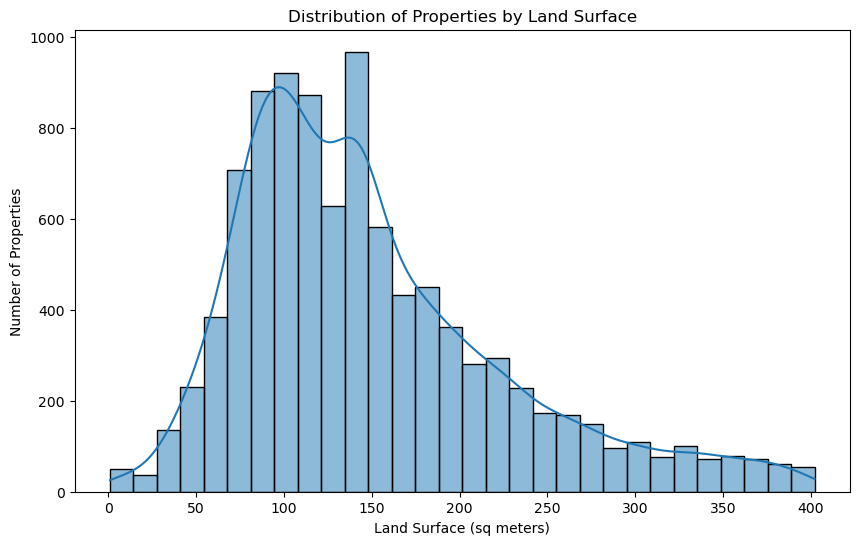

In [42]:
Data=df
#IQR method

Q1 = df['Land_Surface'].quantile(0.25)
Q3 = df['Land_Surface'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Land_Surface'] < lower_bound) | (df['Land_Surface'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

#print(outliers)

# Exclude outliers
df = df[(df['Land_Surface'] >= lower_bound) & (df['Land_Surface'] <= upper_bound)]
# KDE plot overlyed on histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Land_Surface'], bins=30, kde=True, edgecolor='black')
plt.title('Distribution of Properties by Land Surface')
plt.xlabel('Land Surface (sq meters)')
plt.ylabel('Number of Properties')
plt.show()

### Adding the location Data


In [251]:
Location =pd.read_csv("Map.csv")

Location.columns = ["Locality", "Municipality", "Region", "X", "Y"]
Location

,Locality,Municipality,Region,X,Y
0,S Gravenwezel,Antwerpen,Falnders,51.252826,4.594470
1,S Herenelderen,Limburg,Falnders,50.781685,5.466939
2,Aaigem,Oost-Vlaanderen,Falnders,50.916767,3.965006
3,Aalbeke,West-Vlaanderen,Falnders,50.776359,3.224027
4,Aalst,Limburg,Falnders,50.798878,5.227498
...,...,...,...,...,...
2716,Zwevegem,West-Vlaanderen,Falnders,50.805473,3.339351
2717,Zwevezele,West-Vlaanderen,Falnders,51.067812,3.288679
2718,Zwijnaarde,Oost-Vlaanderen,Falnders,51.003447,3.708325
2719,Zwijndrecht,Antwerpen,Falnders,51.231378,4.319816


In [255]:
# Check for duplicate Locality values
duplicates = Location[Location.duplicated('Locality', keep=False)]

# If there are duplicates, decide how to handle them (e.g., keep the first or last, or aggregate)
Location = Location.drop_duplicates(subset='Locality', keep='first') 

In [256]:
df = df.merge(Location[['Locality', 'X', 'Y']], on='Locality', how='left')
df

,Unnamed: 0,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,...,Garden_Area,Land_Surface,State,Facades,Swim_pool,Muniplicity,Region,Surface_total,X,Y
0,0,20316087,Ertvelde,House,house,329000,2,123,1,0,...,0,142,1,3,0,Oost-Vlaanderen,Falnders,0,51.120406,3.707520
1,1,20316069,Hornu,House,house,180000,3,138,0,0,...,1,140,3,2,1,Henegouwen,Wallonia,278,50.423926,3.820832
2,2,20316048,Beersel,House,house,369000,6,230,0,0,...,0,230,5,3,1,Vlaams-Brabant,Falnders,460,50.766251,4.312619
3,3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,...,0,80,1,2,0,Oost-Vlaanderen,Falnders,160,50.820984,3.886864
4,4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,...,170,345,1,2,0,Oost-Vlaanderen,Falnders,500,50.820984,3.886864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,12178,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,...,0,89,1,0,0,West-Vlaanderen,Falnders,171,51.298379,3.141601
10680,12181,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,...,0,129,3,0,0,West-Vlaanderen,Falnders,258,51.346652,3.331958
10681,12185,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,...,0,157,3,2,0,West-Vlaanderen,Falnders,314,51.346652,3.331958
10682,12189,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,...,0,190,1,0,0,West-Vlaanderen,Falnders,380,50.921458,3.260685


### Save Data with Geo info

In [257]:
df.to_csv("Geo_Data.csv")

In [263]:
df

,Unnamed: 0,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,...,Garden_Area,Land_Surface,State,Facades,Swim_pool,Muniplicity,Region,Surface_total,X,Y
0,0,20316087,Ertvelde,House,house,329000,2,123,1,0,...,0,142,1,3,0,Oost-Vlaanderen,Falnders,0,51.120406,3.707520
1,1,20316069,Hornu,House,house,180000,3,138,0,0,...,1,140,3,2,1,Henegouwen,Wallonia,278,50.423926,3.820832
2,2,20316048,Beersel,House,house,369000,6,230,0,0,...,0,230,5,3,1,Vlaams-Brabant,Falnders,460,50.766251,4.312619
3,3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,...,0,80,1,2,0,Oost-Vlaanderen,Falnders,160,50.820984,3.886864
4,4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,...,170,345,1,2,0,Oost-Vlaanderen,Falnders,500,50.820984,3.886864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,12178,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,...,0,89,1,0,0,West-Vlaanderen,Falnders,171,51.298379,3.141601
10680,12181,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,...,0,129,3,0,0,West-Vlaanderen,Falnders,258,51.346652,3.331958
10681,12185,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,...,0,157,3,2,0,West-Vlaanderen,Falnders,314,51.346652,3.331958
10682,12189,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,...,0,190,1,0,0,West-Vlaanderen,Falnders,380,50.921458,3.260685


## Heatmap of Belgium
### Distribution of properties according to price

In [30]:
# File with geo data
df_map = pd.read_csv("/home/learner/Desktop/Data Anlaysis/Data/Geo_Data.csv")

#extract latitude (X), longitude (Y) and price
heat_data = [
    [row['X'], row['Y'], row['Price']] for i, row in df_map.iterrows() if row['Price'] > 0
]

# base map centered on Belgium
map_belgium = folium.Map(location=[50.8503, 4.3517], zoom_start=8)

# Layer heatmap over basemap
HeatMap(heat_data, radius=10, max_zoom=13).add_to(map_belgium)

# Save as html file (interactive)
map_belgium.save('belgium_property_heatmap.html')

# Data encoding

In [3]:
df1=pd.read_csv("/home/learner/Desktop/Data Anlaysis/ImmoEliza-Analysis/Final_cleaned_Data.csv")

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10684 entries, 0 to 10683
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10684 non-null  int64  
 1   Id                  10684 non-null  int64  
 2   Locality            10684 non-null  object 
 3   Type                10684 non-null  object 
 4   SubType             10684 non-null  object 
 5   Price               10684 non-null  int64  
 6   Bedrooms            10684 non-null  int64  
 7   Living_Area         10684 non-null  int64  
 8   Is_Equiped_Kitchen  10684 non-null  int64  
 9   Is_Furnished        10684 non-null  int64  
 10  Is_Open_Fire        10684 non-null  int64  
 11  Terrace             10684 non-null  int64  
 12  Terrace_Area        10684 non-null  int64  
 13  Garden              10684 non-null  int64  
 14  Garden_Area         10684 non-null  int64  
 15  Land_Surface        10684 non-null  int64  
 16  Stat

In [5]:

non_numerical_df = df1.select_dtypes(include=['object'])
non_numerical_df.columns

Index(['Locality', 'Type', 'SubType', 'Muniplicity', 'Region'], dtype='object')

### Starting with Locality


In [6]:
len(df1.Locality.unique())

806

In [9]:
# Initialize the label encoder(each locality to integer)
label_encoder = LabelEncoder()

# Encode the 'Locality' column
df1['Locality_encoded'] = label_encoder.fit_transform(df1['Locality'])

# Display the result
df1[['Locality', 'Locality_encoded']]

,Locality,Locality_encoded
0,Ertvelde,358
1,Hornu,492
2,Beersel,126
3,Geraardsbergen,403
4,Geraardsbergen,403
...,...,...
10679,Blankenberge,180
10680,Knokke,535
10681,Knokke,535
10682,Ingelmunster,509


## Type and subType encoding 

In [10]:
df1.Type.value_counts()

Type
Apartment    5745
House        4939
Name: count, dtype: int64

In [11]:
# Binary encoding
df1['Type_encoded'] = df1['Type'].map({'Apartment': 0, 'House': 1})

# Display the result
print(df1[['Type', 'Type_encoded']])

            Type  Type_encoded
0          House             1
1          House             1
2          House             1
3          House             1
4          House             1
...          ...           ...
10679  Apartment             0
10680  Apartment             0
10681  Apartment             0
10682  Apartment             0
10683  Apartment             0

[10684 rows x 2 columns]


In [12]:
len(df1.SubType.value_counts())

12

In [13]:
# Label encoding 'SubType' using pandas' factorize method
df1['SubType_encoded'] = pd.factorize(df1['SubType'])[0]

# Display the result
print(df1[['SubType', 'SubType_encoded']].value_counts())

SubType               SubType_encoded
apartment             3                  4525
house                 0                  4197
villa                 1                   347
ground-floor          7                   295
penthouse             8                   246
flat-studio           5                   233
duplex                6                   230
apartment-block       10                  216
mixed-use-building    2                   199
town-house            11                   79
exceptional-property  4                    59
mansion               9                    58
Name: count, dtype: int64


## Encoding Muniplicity and Regions

In [14]:
len(df1.Muniplicity.unique())

11

In [15]:
# Label encoding 'Muniplicity' using pandas' factorize method
df1['Muniplicity_encoded'] = pd.factorize(df1['Muniplicity'])[0]

# Display the result
print(df1[['Muniplicity', 'Muniplicity_encoded']].value_counts())

Muniplicity      Muniplicity_encoded
West-Vlaanderen  5                      1844
Brussel          6                      1770
Oost-Vlaanderen  0                      1600
Antwerpen        3                      1503
Luik             10                      976
Vlaams-Brabant   2                       746
Henegouwen       1                       671
Limburg          4                       484
Namen            8                       365
Luxemburg        7                       364
Waals-Brabant    9                       361
Name: count, dtype: int64


In [17]:
# Label encoding 'Region' using pandas' factorize method
df1['Region_encoded'] = pd.factorize(df1['Region'])[0]

# Display the result
print(df1[['Region', 'Region_encoded']].value_counts())


Region    Region_encoded
Flanders  0                 6177
Wallonia  1                 2737
Brussel   2                 1770
Name: count, dtype: int64


In [ ]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the result
print(df.head())

         Id        Locality   Type SubType   Price  Bedrooms  Living_Area  \
0  20316087        Ertvelde  House   house  329000         2          123   
1  20316069           Hornu  House   house  180000         3          138   
2  20316048         Beersel  House   house  369000         6          230   
3  20316039  Geraardsbergen  House   house  145000         2           80   
4  20316038  Geraardsbergen  House   house  269000         3          155   

   Is_Equiped_Kitchen  Is_Furnished  Is_Open_Fire  ...  Facades  Swim_pool  \
0                   1             0             0  ...        3          0   
1                   0             0             0  ...        2          1   
2                   0             0             0  ...        3          1   
3                   1             0             0  ...        2          0   
4                   1             0             0  ...        2          0   

       Muniplicity    Region  Surface_total  Locality_encoded  Type_

In [18]:
df1.set_index("Id")

,Unnamed: 0,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,...,Muniplicity,Region,Surface_total,X,Y,Locality_encoded,Type_encoded,SubType_encoded,Muniplicity_encoded,Region_encoded
Id,,,,,,,,,,,,,,,,,,,,,
20316087,0,Ertvelde,House,house,329000,2,123,1,0,0,...,Oost-Vlaanderen,Flanders,0,51.120406,3.707520,358,1,0,0,0
20316069,1,Hornu,House,house,180000,3,138,0,0,0,...,Henegouwen,Wallonia,278,50.423926,3.820832,492,1,0,1,1
20316048,2,Beersel,House,house,369000,6,230,0,0,0,...,Vlaams-Brabant,Flanders,460,50.766251,4.312619,126,1,0,2,0
20316039,3,Geraardsbergen,House,house,145000,2,80,1,0,0,...,Oost-Vlaanderen,Flanders,160,50.820984,3.886864,403,1,0,0,0
20316038,4,Geraardsbergen,House,house,269000,3,155,1,0,0,...,Oost-Vlaanderen,Flanders,500,50.820984,3.886864,403,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972064,10679,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,...,West-Vlaanderen,Flanders,171,51.298379,3.141601,180,0,3,5,0
8945382,10680,Knokke,Apartment,duplex,699000,4,129,0,0,0,...,West-Vlaanderen,Flanders,258,51.346652,3.331958,535,0,6,5,0
8746466,10681,Knokke,Apartment,apartment,950000,2,157,0,0,0,...,West-Vlaanderen,Flanders,314,51.346652,3.331958,535,0,3,5,0


In [19]:
numerical_data = df1.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix.Price

Unnamed: 0            -0.010906
Id                     0.031021
Price                  1.000000
Bedrooms               0.354158
Living_Area            0.469745
Is_Equiped_Kitchen     0.057359
Is_Furnished          -0.024984
Is_Open_Fire           0.088585
Terrace                0.111909
Terrace_Area           0.163179
Garden                 0.052013
Garden_Area            0.099540
Land_Surface           0.170649
State                 -0.016617
Facades                0.100192
Swim_pool              0.103847
Surface_total          0.227207
X                      0.178599
Y                     -0.078915
Locality_encoded       0.154906
Type_encoded           0.075502
SubType_encoded        0.076986
Muniplicity_encoded   -0.056789
Region_encoded         0.065164
Name: Price, dtype: float64

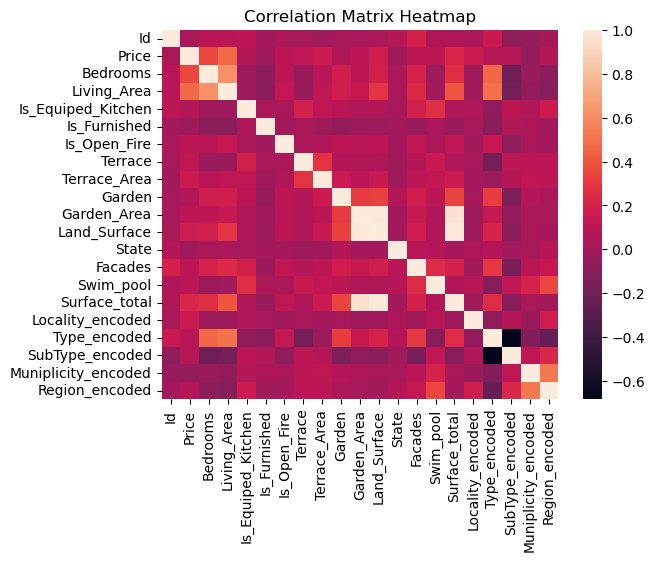

In [ ]:
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')

# Save the heatmap image in the 'graphs' folder
plt.savefig('graphs/Encoded_Good_correlation_heatmap.png', bbox_inches='tight')  # Save as PNG in the 'graphs' folder

# Show the plot (optional)
plt.show()

Unnamed: 0            -0.010906
Id                     0.031021
Price                  1.000000
Bedrooms               0.354158
Living_Area            0.469745
Is_Equiped_Kitchen     0.057359
Is_Furnished          -0.024984
Is_Open_Fire           0.088585
Terrace                0.111909
Terrace_Area           0.163179
Garden                 0.052013
Garden_Area            0.099540
Land_Surface           0.170649
State                 -0.016617
Facades                0.100192
Swim_pool              0.103847
Surface_total          0.227207
X                      0.178599
Y                     -0.078915
Locality_encoded       0.154906
Type_encoded           0.075502
SubType_encoded        0.076986
Muniplicity_encoded   -0.056789
Region_encoded         0.065164
Name: Price, dtype: float64


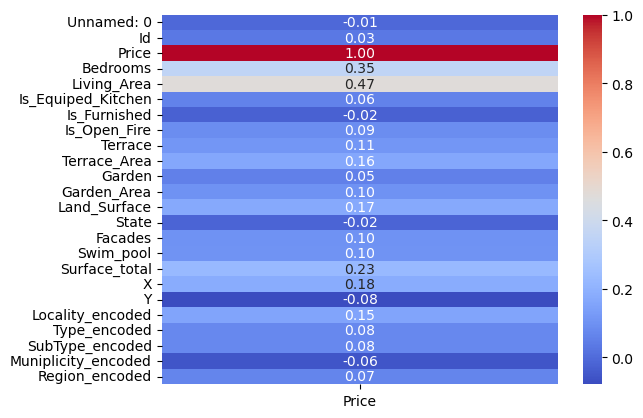

In [20]:
print(correlation_matrix.Price)
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [24]:
# Drop all non-numerical columns
df1 = df1.drop(columns=df1.select_dtypes(exclude=['number']).columns)
df1 = df1.drop(columns=["Unnamed: 0",'X', 'Y'])
# Display the result
df1.head()

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,...,Land_Surface,State,Facades,Swim_pool,Surface_total,Locality_encoded,Type_encoded,SubType_encoded,Muniplicity_encoded,Region_encoded
0,20316087,329000,2,123,1,0,0,1,0,0,...,142,1,3,0,0,358,1,0,0,0
1,20316069,180000,3,138,0,0,0,1,1,1,...,140,3,2,1,278,492,1,0,1,1
2,20316048,369000,6,230,0,0,0,1,0,0,...,230,5,3,1,460,126,1,0,2,0
3,20316039,145000,2,80,1,0,0,0,0,0,...,80,1,2,0,160,403,1,0,0,0
4,20316038,269000,3,155,1,0,0,1,20,1,...,345,1,2,0,500,403,1,0,0,0


In [25]:
df1.to_csv("Encoded_Data.csv")
